In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
data_file = "/mnt/d/wsl/dataset/connections.csv"
df_raw_data = pd.read_csv(data_file)
df_raw_data.groupby("attack").agg({'count':'count'}).reset_index("attack").sort_values(by='count', ascending=False)

attack   count
10           normal.  972781
16            satan.   15892
5           ipsweep.   12481
14        portsweep.   10413
9              nmap.    2316
0              back.    2203
19      warezclient.    1020
18         teardrop.     979
13              pod.     264
3      guess_passwd.      53
1   buffer_overflow.      30
6              land.      21
20      warezmaster.      20
4              imap.      12
15          rootkit.      10
7        loadmodule.       9
2         ftp_write.       8
8          multihop.       7
12              phf.       4
11             perl.       3
17              spy.       2

In [3]:
feature_names = ["srcbytes","dstbytes","land","wrongfragment","urgent","hot","numfailedlogins","loggedin","numcompromised","rootshell","suattempted","numroot","numfilecreations","numshells","numaccessfiles","numoutboundcmds","ishostlogin","isguestlogin","count","srvcount","serrorrate","srvserrorrate","rerrorrate","srvrerrorrate","samesrvrate","diffsrvrate","srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate","dsthostdiffsrvrate","dsthostsamesrcportrate","dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate","dsthostrerrorrate","dsthostsrvrerrorrate"]
NORMAL = 'normal.'
THREAT = 'satan.'

In [4]:
df_data = df_raw_data[(df_raw_data['attack']== NORMAL) | (df_raw_data['attack'] == THREAT)][feature_names]

In [5]:
df_data

srcbytes  dstbytes  land  wrongfragment  urgent  hot  \
0             215     45076     0              0       0    0   
1             162      4528     0              0       0    0   
2             236      1228     0              0       0    0   
3             233      2032     0              0       0    0   
4             239       486     0              0       0    0   
...           ...       ...   ...            ...     ...  ...   
1018523       212      2288     0              0       0    0   
1018524       219       236     0              0       0    0   
1018525       218      3610     0              0       0    0   
1018526       219      1234     0              0       0    0   
1018527       219      1098     0              0       0    0   

         numfailedlogins  loggedin  numcompromised  rootshell  ...  \
0                      0         1               0          0  ...   
1                      0         1               0          0  ...   
2                      0         1               0          0  ...   
3                      0         1               0          0  ...   
4                      0         1               0          0  ...   
...                  ...       ...             ...        ...  ...   
1018523                0         1               0          0  ...   
1018524                0         1               0          0  ...   
1018525                0         1               0          0  ...   
1018526                0         1               0          0  ...   
1018527                0         1               0          0  ...   

         dsthostcount  dsthostsrvcount  dsthostsamesrvrate  \
0                   0                0                 0.0   
1                   1                1                 1.0   
2                   2                2                 1.0   
3                   3                3                 1.0   
4                   4                4                 1.0   
...               ...              ...                 ...   
1018523             3              255                 1.0   
1018524             4              255                 1.0   
1018525             5              255                 1.0   
1018526             6              255                 1.0   
1018527             7              255                 1.0   

         dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0                       0.0                    0.00                    0.00   
1                       0.0                    1.00                    0.00   
2                       0.0                    0.50                    0.00   
3                       0.0                    0.33                    0.00   
4                       0.0                    0.25                    0.00   
...                     ...                     ...                     ...   
1018523                 0.0                    0.33                    0.05   
1018524                 0.0                    0.25                    0.05   
1018525                 0.0                    0.20                    0.05   
1018526                 0.0                    0.17                    0.05   
1018527                 0.0                    0.14                    0.05   

         dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                      0.0                  0.00                0.0   
1                      0.0                  0.00                0.0   
2                      0.0                  0.00                0.0   
3                      0.0                  0.00                0.0   
4                      0.0                  0.00                0.0   
...                    ...                   ...                ...   
1018523                0.0                  0.01                0.0   
1018524                0.0                  0.01                0.0   
1018525                0.0                  0.01      

In [6]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(df_data)
df_data_scaled = pd.DataFrame(data=scaler.transform(df_data),columns=feature_names)

In [7]:
df_data_scaled

srcbytes  dstbytes      land  wrongfragment    urgent       hot  \
0      -0.011305  1.233685 -0.002661            0.0 -0.002231 -0.052736   
1      -0.011788  0.039617 -0.002661            0.0 -0.002231 -0.052736   
2      -0.011113 -0.057562 -0.002661            0.0 -0.002231 -0.052736   
3      -0.011141 -0.033886 -0.002661            0.0 -0.002231 -0.052736   
4      -0.011086 -0.079413 -0.002661            0.0 -0.002231 -0.052736   
...          ...       ...       ...            ...       ...       ...   
988668 -0.011332 -0.026347 -0.002661            0.0 -0.002231 -0.052736   
988669 -0.011268 -0.086775 -0.002661            0.0 -0.002231 -0.052736   
988670 -0.011277  0.012584 -0.002661            0.0 -0.002231 -0.052736   
988671 -0.011268 -0.057386 -0.002661            0.0 -0.002231 -0.052736   
988672 -0.011268 -0.061390 -0.002661            0.0 -0.002231 -0.052736   

        numfailedlogins  loggedin  numcompromised  rootshell  ...  \
0             -0.007414  0.642573       -0.004401   -0.01748  ...   
1             -0.007414  0.642573       -0.004401   -0.01748  ...   
2             -0.007414  0.642573       -0.004401   -0.01748  ...   
3             -0.007414  0.642573       -0.004401   -0.01748  ...   
4             -0.007414  0.642573       -0.004401   -0.01748  ...   
...                 ...       ...             ...        ...  ...   
988668        -0.007414  0.642573       -0.004401   -0.01748  ...   
988669        -0.007414  0.642573       -0.004401   -0.01748  ...   
988670        -0.007414  0.642573       -0.004401   -0.01748  ...   
988671        -0.007414  0.642573       -0.004401   -0.01748  ...   
988672        -0.007414  0.642573       -0.004401   -0.01748  ...   

        dsthostcount  dsthostsrvcount  dsthostsamesrvrate  dsthostdiffsrvrate  \
0          -1.451885        -2.213256           -2.593249           -0.333398   
1          -1.442217        -2.202125            0.525410           -0.333398   
2          -1.432550        -2.190994            0.525410           -0.333398   
3          -1.422883        -2.179863            0.525410           -0.333398   
4          -1.413215        -2.168732            0.525410           -0.333398   
...              ...              ...                 ...                 ...   
988668     -1.422883         0.625153            0.525410           -0.333398   
988669     -1.413215         0.625153            0.525410           -0.333398   
988670     -1.403548         0.625153            0.525410           -0.333398   
988671     -1.393881         0.625153            0.525410           -0.333398   
988672     -1.384214         0.625153            0.525410           -0.333398   

        dsthostsamesrcportrate  dsthostsrvdiffhostrate  dsthostserrorrate  \
0                    -0.475421               -0.475312          -0.111627   
1                     3.073678               -0.475312          -0.111627   
2                     1.299128               -0.475312          -0.111627   
3                     0.695781               -0.475312          -0.111627   
4                     0.411853               -0.475312          -0.111627   
...                        ...                     ...                ...   
988668                0.695781                0.516906          -0.111627   
988669                0.411853                0.516906          -0.111627   
988670                0.234398                0.516906          -0.111627   
988671                0.127925                0.516906          -0.111627   
988672                0.021453                0.516906          -0.111627   

        dsthostsrvserrorrate  dsthostrerrorrate  dsthostsrvrerrorrate  
0                  -0.062701          -0.285309             -0.279887  
1                  -0.062701          -0.285309             -0.279887  
2                  -0.062701          -0.285309             -0.279887  
3                  -0.062701          -0.285309             -0.279887  
4                  -

In [8]:
pca = PCA(n_components=2).fit(df_data_scaled)
pca.components_

array([[ 2.38779994e-04, -1.32231021e-02,  9.91955515e-03,
        -9.17902759e-22,  5.53733551e-04,  2.27127617e-03,
         2.93028067e-03, -2.35401709e-01,  2.43154890e-03,
         1.24073261e-03,  5.64121862e-03,  2.62565418e-03,
         4.80176736e-03,  8.27866006e-04, -8.05174929e-03,
         0.00000000e+00,  2.35411566e-03,  2.72699915e-03,
         2.77563735e-01, -6.55888619e-02,  1.75200794e-01,
         1.27631935e-01,  3.20319530e-01,  3.12616553e-01,
        -3.03467522e-01,  2.85476097e-01, -1.12577870e-02,
        -3.31128983e-03, -2.18590527e-01, -2.14293689e-01,
         2.65626710e-01,  1.32010268e-01,  1.23807531e-01,
         1.67509128e-01,  1.29631192e-01,  3.19625057e-01,
         3.12604785e-01],
       [ 6.06805399e-03,  4.43564230e-03,  8.22160305e-03,
        -3.92194325e-20,  2.45353218e-03,  3.85051793e-02,
         5.72022600e-03, -1.52316903e-02,  1.18002279e-02,
         1.03573939e-02,  1.66649037e-02,  1.29644000e-02,
         1.37197345e-02,  8.14

In [9]:
type(pca.components_)

numpy.ndarray

In [10]:
# #original in scala
# def nre_func(pcm : Matrix) = udf[Double, Vector] { v => {
#  val pcmt = new breeze.linalg.DenseMatrix(pcm.numRows, pcm.numCols, pcm.toArray).t
#  val vt = DenseVector(v.toArray)
#  val projects = pcmt * vt
#  sqrt(vt.t * vt - projects.t * projects)
#  }
# }

def reconstruction_error(arr,pc,cols):
    l=[]
    for c in cols:
        l.append(arr[c])
    v = np.array(l)
    w = v*np.transpose(pc)
    return  np.sqrt(np.linalg.norm(v)**2 - np.linalg.norm(w)**2)

from datetime import datetime
print("started to compute reconstruction errors: " + str(datetime.now()))
df_data_scaled['re']=df_data_scaled.apply(reconstruction_error,axis=1,args=(np.asmatrix(pca.components_),feature_names))
print("finished computing reconstruction errors: " + str(datetime.now()))

started to compute reconstruction errors: 2020-03-18 12:16:26.122504
finished computing reconstruction errors: 2020-03-18 12:21:01.595850


In [11]:
print("mean = %f" % df_data_scaled['re'].mean(axis=0))
print("median = %f" % df_data_scaled['re'].median(axis=0))

mean = 2.699238
median = 1.818739


In [25]:
df_data_threat = df_raw_data[df_raw_data['attack'] == THREAT][feature_names]
df_data_threat_scaled = pd.DataFrame(data=scaler.transform(df_data_threat),columns=feature_names)
df_data_threat_scaled['re']=df_data_threat_scaled.apply(reconstruction_error,axis=1,
                                                        args=(np.asmatrix(pca.components_),feature_names))


In [26]:
print("mean = %f" %df_data_threat_scaled['re'].mean(axis=0))
print("median = %f" %df_data_threat_scaled['re'].median(axis=0))

mean = 9.416653
median = 7.149482


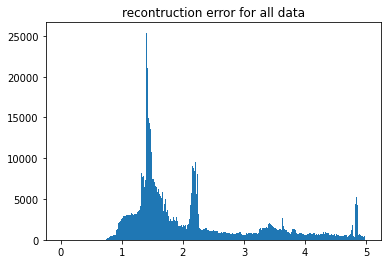

In [27]:
plt.hist(df_data_scaled['re'].values, bins =  np.arange(0,5,0.01)) 
plt.title("recontruction error for all data") 
plt.show()

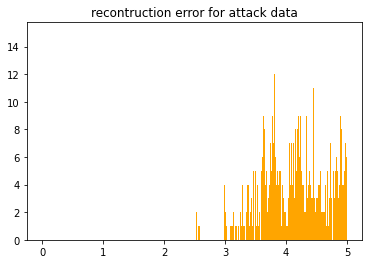

In [29]:
plt.hist(df_data_threat_scaled['re'].values, bins =  np.arange(0,5,0.01), color="orange") 
plt.title("recontruction error for attack data") 
plt.show()

In [30]:
projections = pca.transform(df_data_scaled.drop(["re"], axis=1))
threat_projections = pca.transform(df_data_threat_scaled.drop(["re"], axis=1))
mahalanobis = np.array([np.linalg.norm(v) for v in projections])
threat_mahalanobis = np.array([np.linalg.norm(v) for v in threat_projections])

In [7]:
# def mahalanobis_func(coeff : Matrix) = udf[Double, Vector] { v => {
#   val invCovariance = inv(new breeze.linalg.DenseMatrix(2, 2, coeff.toArray))
#   val vB = DenseVector(v.toArray)
#   sqrt(vB.t * invCovariance * vB)
#   }
# }

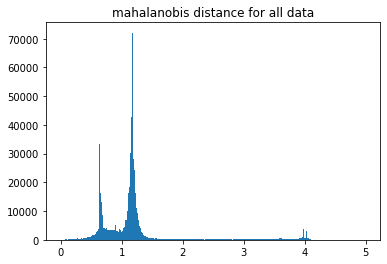

In [31]:
plt.hist(mahalanobis, bins = np.arange(0,5,0.01)) 
plt.title("mahalanobis distance for all data") 
plt.show()

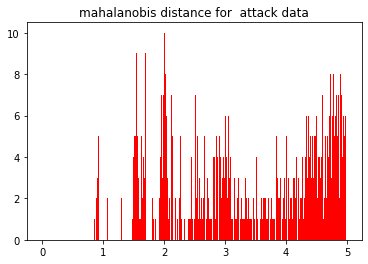

In [32]:
plt.hist(threat_mahalanobis, bins = np.arange(0,5,0.01), color="r") 
plt.title("mahalanobis distance for  attack data") 
plt.show()